## PROBLEM 5:

Using linear regression

In [10]:
#Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
#Reading the file with pandas

df = pd.read_csv('/home/jdiego/Downloads/books (1).dat',sep = '\s+')
#CHecking the data is correct
#print(df)

In [5]:
#Using the keys() function to get the correct names of the colums and abois typign error
keys = df.keys()

#checking the keys
#print(keys)

Index(['N', 'Pages', 'Thickness'], dtype='object')


In [7]:
#COnverting into arrays the data from the file 
pages = np.array(df[keys[1]])
thick = np.array(df[keys[2]])

#checking the data is correct
#print(pages,thick)

[ 10  20  30  40  50  60  70  80  90 100] [ 3.   4.5  5.5  7.   8.   9.   9.5 11.1 12.  12.9]


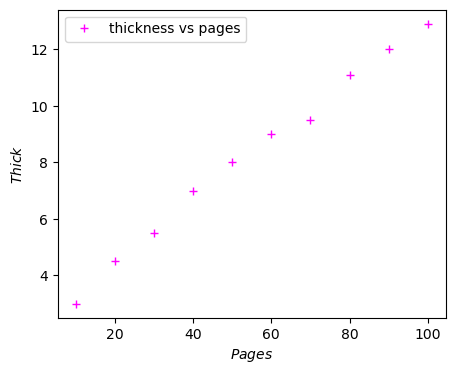

In [9]:
#ploting

#Firste we create the enviroment
plt.figure(figsize=(5,4))

plt.plot(pages,thick , color = 'magenta',linestyle = ' ', marker = '+', label= 'thickness vs pages')

#labeling

plt.xlabel (r'$Pages$')
plt.ylabel (r'$Thick$')
plt.legend()
plt.show()

In [15]:
#Using the pearsonr() and spearmanr() dunctions to find the values

pr = st.pearsonr(pages,thick)

sp = st.spearmanr(pages,thick)

#checking the values
#print(pr)
#print(sp)

PearsonRResult(statistic=0.9967647822032424, pvalue=4.774249416992817e-10)
SignificanceResult(statistic=0.9999999999999999, pvalue=6.646897422032013e-64)


In [20]:
#To fit the data we use a linear model i.e --> y = mx +b 
#Using np.polyfit()

m , b = np.polyfit(pages,thick,1)

#checkign the values of m and b 
#print(m,b)

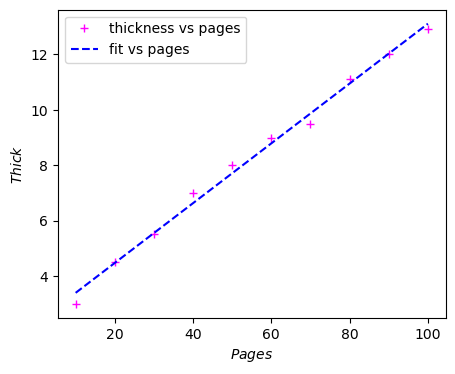

In [18]:
#then the fitting is: 

fit = m*pages + b 


#Firste we create the enviroment
plt.figure(figsize=(5,4))

plt.plot(pages,thick , color = 'magenta',linestyle = ' ', marker = '+', label= 'thickness vs pages')
plt.plot(pages, fit , color = 'blue', linestyle = '--', label = 'fit vs pages')
#labeling

plt.xlabel (r'$Pages$')
plt.ylabel (r'$Thick$')
plt.legend()
plt.show()

#### A better way to fit the courves might be using Scipy functions 

In [21]:
import scipy.optimize as opt

In [26]:
#defining the model: 

def fiting (pages,m,b): 
    '''
    The function to fit data. This one
    use a linear polynomial
    INPUT: m-->Slope, b-->Intecerpt with y and pages--> data vecotr
    OUTPUT: linear function
    '''
    y = m*pages + b 
    
    return y

In [29]:
#Using the curve_fit() function--> It recievs a function f and use the leat squeare to fit the model


# Call the curve_fit() function
coef, cova = opt.curve_fit(fiting, pages, thick)

# Double check
#print(cova) # Covariance matrix
print(coef) # The fitting parameters m and b (optimal)
print(type(coef)) # We got numpy arrays

# Print result:
print('thickness = %.5f * pages + %.5f' % (coef[0], coef[1]))

[0.10793939 2.31333333]
<class 'numpy.ndarray'>
thickness = 0.10794 * pages + 2.31333


In [35]:
#Defingn the new fit model: 

fit_2 = fiting(pages, coef[0],coef[1])


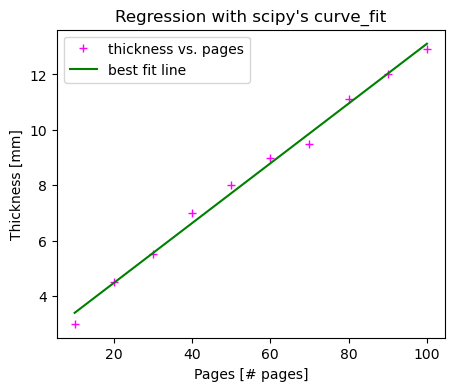

In [36]:
# replot the data with the new fit

# Figure environment
plt.figure(figsize = (5,4))

plt.title("Regression with scipy's curve_fit")

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_2, color = "green",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

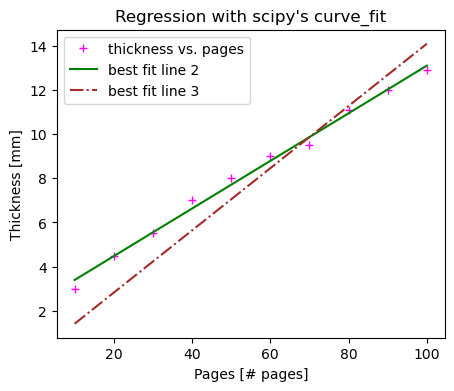

In [38]:
# Define the model function to fit the data

def fit_model2(x_values, m):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: x_values (data vector), m -> slope, b -> intercept with Y-axis
    Output: y_values (linear finction)
    """
    y_values = m * x_values
    
    return y_values
# Call the curve_fit() function
coef2, cova2 = opt.curve_fit(fit_model2, pages, thick)

# Another way to get the fit data
fit_thick3 = fit_model2(pages, *coef2)
# replot the data with the new fit

# Figure environment
plt.figure(figsize = (5,4))

plt.title("Regression with scipy's curve_fit")

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_2, color = "green",\
        linestyle = "-", label = "best fit line 2")

plt.plot(pages, fit_thick3, color = "brown",\
        linestyle = "-.", label = "best fit line 3")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()